In [1]:
import math as math
import numpy as np
import random
import matplotlib.pyplot as plt
import operator

In [2]:
#Задаем матрицу переходных вероятностей

def transition_matrix():
    matrix = [[0.95, 0.05], [0.1, 0.9]]
    return(matrix)


#Матрица наблюдений

def emission_matrix():
    matrix = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]
    return(matrix)


#Матрица начального распределения

def beginning_distribution_matrix():
    matrix = [0.5, 0.5]
    return(matrix)

In [3]:
#Моделирование Скрытого марковского процесса

def HMM(transition_matrix, emission_matrix, beginning_distribution_matrix, L):
    state_path = []
    path = []
    state = random.randint(0,1)
    
    for i in range(L):
        if state == 0:
            path.append(random.randint(0, 5))
            state_path.append(0)
            state = np.random.choice([0, 1], p=[0.95, 0.05])
        else:
            path.append(np.random.choice(6, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5]))
            state_path.append(1)
            state = np.random.choice([0, 1], p=[0.1, 0.9])
    return(path, state_path)

In [4]:
def Viterbi(rolls, L, transition_matrix, emission_matrix, beginning_distribution_matrix):
    state_path = []
    path_of_v_i_j = []
    
    for i in range(len(rolls)):
        if i == 0:
            max_v_i_j = float('-inf')
            for j in range(len(beginning_distribution_matrix)):
                v_i_j = math.log(emission_matrix[j][rolls[i]-1]) + math.log(beginning_distribution_matrix[j])
                if v_i_j > max_v_i_j:
                    max_v_i_j = v_i_j
                    arg_max_j = j
            path_of_v_i_j.append(max_v_i_j)
            state_path.append(arg_max_j)
        else:
            max_v_i_j = float('-inf')
            for j in range(len(beginning_distribution_matrix)):
                v_i_j = math.log(emission_matrix[j][rolls[i]-1]) + (path_of_v_i_j[i-1]) + math.log(transition_matrix[arg_max_j][j])
                if v_i_j > max_v_i_j:
                    max_v_i_j = v_i_j
                    arg_max_j = j
            path_of_v_i_j.append(max_v_i_j)
            state_path.append(arg_max_j)
    return(state_path)

In [5]:
#Forward algorithm

def Forward(emission_matrix, transition_matrix, rolls, L, beginning_distribution_matrix):
    Fk = [[0]*(L+1), [0]*(L+1)]
    Fk[0][0] = Fk[1][0] =1
    Fk[0][1] = emission_matrix[0][rolls[0]-1]*beginning_distribution_matrix[0]
    Fk[1][1] = emission_matrix[1][rolls[0]-1]*beginning_distribution_matrix[1]
    for i in range(2, L+1):
        Fk[0][i] = emission_matrix[0][rolls[i-1]-1]*(Fk[0][i-1]*transition_matrix[0][0] + Fk[1][i-1]*transition_matrix[1][0])
        Fk[1][i] = emission_matrix[1][rolls[i-1]-1]*(Fk[1][i-1]*transition_matrix[1][1] + Fk[0][i-1]*transition_matrix[0][1])
    return(Fk)

In [6]:
#Backward algorithm

def Backward(emission_matrix, transition_matrix, rolls, L, beginning_distribution_matrix):
    Bk = [[0]*(L+1), [0]*(L+1)]
    Bk[0][-1] = Bk[1][-1] = 1
    for i in range(L-1,-1,-1):
        Bk[0][i] = (emission_matrix[0][rolls[i]-1]*Bk[0][i+1]*transition_matrix[0][0] + emission_matrix[1][rolls[i]-1]*Bk[1][i+1]*transition_matrix[0][1])
        Bk[1][i] = (emission_matrix[1][rolls[i]-1]*Bk[1][i+1]*transition_matrix[1][1] + emission_matrix[0][rolls[i]-1]*Bk[0][i+1]*transition_matrix[1][0])
    Bk[0][0] = Bk[0][0]*beginning_distribution_matrix[0]
    Bk[1][0] = Bk[1][0]*beginning_distribution_matrix[1]
    return(Bk)

In [7]:
#Posterior decoding

def Post_decoding(forward, backward, L):
    posterior = [0]*(L+1)
    for i in range(L+1):
        posterior[i] = (forward[0][i]*backward[0][i])/(forward[0][-1] + forward[1][-1])
    return(posterior)

In [8]:
#Моделируем СММ и путь Витерби

rolls, states = HMM(transition_matrix(), emission_matrix(), beginning_distribution_matrix(), 100)
viterbi_path = Viterbi(rolls, 100, transition_matrix(), emission_matrix(), beginning_distribution_matrix())

a, b, c = '', '', ''
for i in range(100):
    a += (str(rolls[i]))
    b += (str(states[i]))
    c += (str(viterbi_path[i]))
    
print('rolls:   ',a) 
print('states:  ',b,) 
print('viterbi: ',c)

rolls:    5143545505410230055531505354255545512350545511253154124555055045355555015444404015253223453203454442
states:   1111111000001111111111111111111111100111111111111111111111011111111111111000000000000000000000111111
viterbi:  0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [9]:
#Прямой и обратный алгоритмы

Bk = Backward(emission_matrix(), transition_matrix(), rolls, 100, beginning_distribution_matrix())
resb = Bk[0][0] + Bk[1][0]
Fk = Forward(emission_matrix(),transition_matrix(), rolls, 100, beginning_distribution_matrix())
resf = Fk[0][-1] + Fk[1][-1]
print('Вероятность по прямому алгоритму:       ',resf)
print('Вероятность по алгоритму обратного хода:',resb)

Вероятность по прямому алгоритму:        4.225080167234868e-80
Вероятность по алгоритму обратного хода: 4.379620159713083e-80


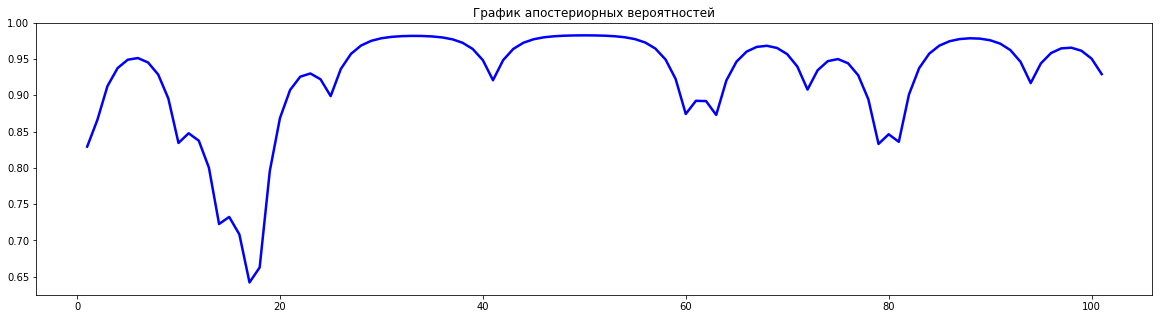

In [10]:
#Апостериарные вероятности

decode = Post_decoding(Fk, Bk, 100)
x = np.linspace(1, 101, 101)
fig, ax = plt.subplots()
ax.plot(x, decode, color="blue", lw = 2.5)
ax.set_title('График апостериорных вероятностей')
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.show()